In [1]:
library(OpenStreetMap)
library(ggplot2)
library(sp)
library (rgdal)
library(readr)


code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolygons” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for me

In [2]:
occurrences <- read_tsv("data/GBIF_Ciconia_ciconia.zip")
head(occurrences)

Parsed with column specification:
cols(
  .default = col_character(),
  gbifID = col_double(),
  infraspecificEpithet = col_logical(),
  verbatimScientificNameAuthorship = col_logical(),
  individualCount = col_logical(),
  decimalLatitude = col_double(),
  decimalLongitude = col_double(),
  coordinateUncertaintyInMeters = col_double(),
  coordinatePrecision = col_logical(),
  elevation = col_logical(),
  elevationAccuracy = col_logical(),
  depth = col_logical(),
  depthAccuracy = col_logical(),
  eventDate = col_datetime(format = ""),
  day = col_double(),
  month = col_double(),
  year = col_double(),
  taxonKey = col_double(),
  speciesKey = col_double(),
  catalogNumber = col_double(),
  recordNumber = col_logical()
  # ... with 4 more columns
)

See spec(...) for full column specifications.

Warning message:
“654563 parsing failures.
 row             col           expected       actual                            file
6708 individualCount 1/0/T/F/TRUE/FALSE 500          'data/GBIF

gbifID     datasetKey                          
1 2494191605 ec672054-fde4-4046-9faa-5d7740782636
2 1618705170 f06fef3c-6ea6-4345-b724-a1b8e490dc55
3 1618706235 f06fef3c-6ea6-4345-b724-a1b8e490dc55
4 1618707691 f06fef3c-6ea6-4345-b724-a1b8e490dc55
5 1618708873 f06fef3c-6ea6-4345-b724-a1b8e490dc55
6 1618709926 f06fef3c-6ea6-4345-b724-a1b8e490dc55
  occurrenceID                         kingdom  phylum   class order        
1 3eb79ae6-c9ec-11e7-b1fe-0050569670db Animalia Chordata Aves  Ciconiiformes
2 SEO-BirdLife:anillamientoseo:6946843 Animalia Chordata Aves  Ciconiiformes
3 SEO-BirdLife:anillamientoseo:6947798 Animalia Chordata Aves  Ciconiiformes
4 SEO-BirdLife:anillamientoseo:6949110 Animalia Chordata Aves  Ciconiiformes
5 SEO-BirdLife:anillamientoseo:6950172 Animalia Chordata Aves  Ciconiiformes
6 SEO-BirdLife:anillamientoseo:6951126 Animalia Chordata Aves  Ciconiiformes
  family     genus   species         ⋯ identifiedBy                 
1 Ciconiidae Ciconia Ciconia ciconia ⋯ Non renseigné (Non renseigné)
2 Ciconiidae Ciconia Ciconia ciconia ⋯ NA                           
3 Ciconiidae Ciconia Ciconia ciconia ⋯ NA                           
4 Ciconiidae Ciconia Ciconia ciconia ⋯ NA                           
5 Ciconiidae Ciconia Ciconia ciconia ⋯ NA                           
6 Ciconiidae Ciconia Ciconia ciconia ⋯ NA                           
  dateIdentified license      rightsHolder recordedBy                     
1 NA             CC_BY_NC_4_0 NA           PRAT Christine, (Non renseigné)
2 NA             CC_BY_NC_4_0 SEO-BirdLife NA                             
3 NA             CC_BY_NC_4_0 SEO-BirdLife NA                             
4 NA             CC_BY_NC_4_0 SEO-BirdLife NA                             
5 NA             CC_BY_NC_4_0 SEO-BirdLife NA                             
6 NA             CC_BY_NC_4_0 SEO-BirdLife NA                             
  typeStatus establishmentMeans lastInterpreted     mediaType
1 NA         NA                 2020-09-02 15:28:28 NA       
2 NA         NATIVE             2020-09-01 16:39:18 NA       
3 NA         NATIVE             2020-09-01 16:39:42 NA       
4 NA         NATIVE             2020-09-01 16:39:31 NA       
5 NA         NATIVE             2020-09-01 16:39:39 NA       
6 NA         NATIVE             2020-09-01 16:39:18 NA       
  issue                       
1 GEODETIC_DATUM_ASSUMED_WGS84
2 NA                          
3 NA                          
4 NA                          
5 NA                          
6 NA

In [ ]:
colnames(occurrences)
as.numeric(format(as.Date(occurrences$eventDate), "%U"))

In [5]:

LAT1 = 70 ; LAT2 = -50
LON1 = -20 ; LON2 = 90
map <- openmap(
    c(LAT2,LON1), c(LAT1,LON2),
    zoom = 2,
    type = "esri-topo",
    mergeTiles = TRUE)
print("done loading map")

[1] "done loading map"


In [15]:
occurrences.clean <- occurrences[
    !is.na(occurrences$decimalLatitude) & 
    !is.na(occurrences$decimalLongitude) & 
    !is.na(occurrences$month) &
    occurrences$decimalLatitude<LAT1 & occurrences$decimalLatitude > LAT2 &
    occurrences$decimalLongitude > LON1 & occurrences$decimalLongitude < LON2
    ,]
nrow(occurrences.clean)
#occurrences.clean$week <- as.numeric(format(as.Date(occurrences.clean$eventDate), "%U"))
#head(occurrences.clean)
# length(weeks)

[1] 497242

In [16]:
# randomly sample 10.000 occurrences
occurrences.sampled <-
   occurrences.clean[sample(nrow(occurrences.clean), 25000),]


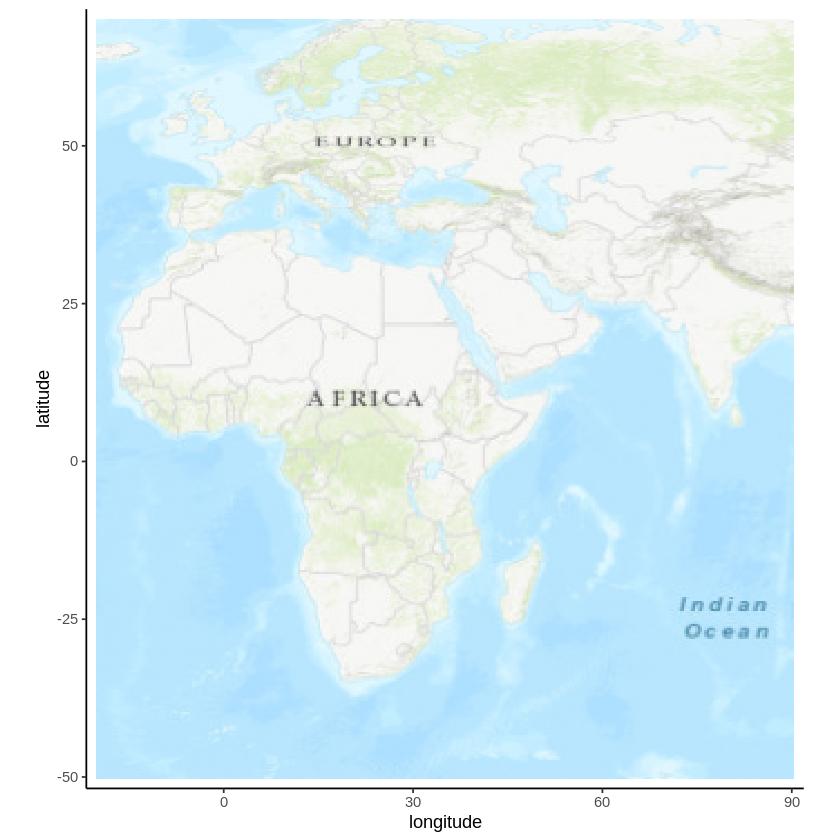

In [6]:
# proj <- "+proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +wktext  +no_defs"
proj <- "+proj=longlat +ellps=clrk66"
map.proj <- openproj(map, projection = proj)
autoplot(map.proj) +
    theme_classic() +
    labs(x="longitude", y="latitude")


In [17]:
coordinates(occurrences.sampled) <- c("decimalLongitude", "decimalLatitude")
proj4string(occurrences.sampled) <- CRS(proj)
# re-project the data 
occurrences.proj <- spTransform(occurrences.sampled, CRS=CRS(proj))

print("done projecting data")

[1] "done projecting data"


In [13]:
month_labeller <- function(variable,value){
  return(month.name[value])
}

Warning message:
“The labeller API has been updated. Labellers taking `variable` and `value` arguments are now deprecated. See labellers documentation.”


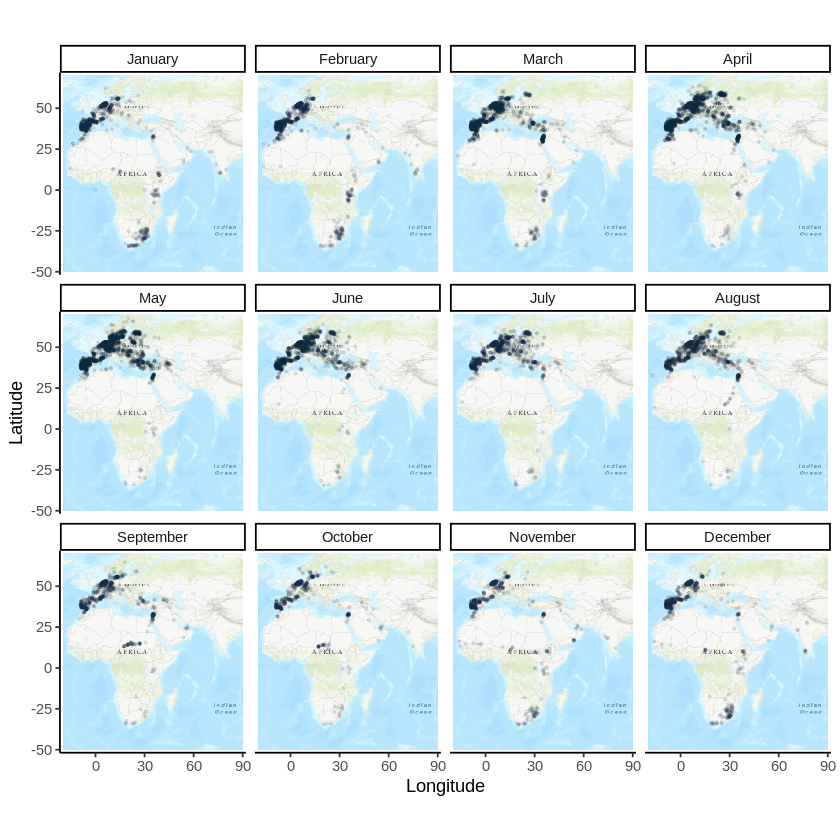

In [18]:
autoplot(map.proj) +
    geom_count(
        data = data.frame(occurrences.proj),
        aes(x = decimalLongitude, y = decimalLatitude,
        color = ..prop..
        ), alpha=0.1, size=0.5, show.legend = FALSE
    ) +
    scale_fill_gradient(low="red", high="yellow") +
    facet_wrap(~month, labeller = month_labeller) +
    theme_classic() +
    labs(x="Longitude", y="Latitude")

# References
GBIF.org (07 September 2020) GBIF Occurrence Download https://doi.org/10.15468/dl.vm74xx